<a href="https://colab.research.google.com/github/JMML2021/0501_sampling/blob/main/05_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Descripció
Aprèn a realitzar mostreig de les dades amb Python.

In [2]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/01_COLAB/kaggle.json'

In [4]:
# Abro el fichero una vez adecuado

path = ('/content/drive/MyDrive/01_COLAB/resultsFutbol.csv')
df=  pd.read_csv(path)
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')

Hay  41243 filas con 9 columnas


In [5]:
df1 = df.copy()

# Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [6]:
# Muestreo aleatorio
# Escojo una muestar de 1.000 elementos.

muestra_df1 = df1.sample(1000)


ganado= muestra_df1[(muestra_df1['home_score'] > muestra_df1['away_score'])].count()
jugado= muestra_df1.shape[0]
porcentaje= ganado/jugado*100
print(round(porcentaje,2), '%')


date          45.9
home_team     45.9
away_team     45.9
home_score    45.9
away_score    45.9
tournament    45.9
city          45.9
country       45.9
neutral       45.9
dtype: float64 %


In [7]:
# Muestreo sistematico
# Creo una función que cada 5 elementos escojo un registro
import numpy as np


# Creo la funcion de muestreo sistematico
def muestreoSistematico(df, step):
 
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample


muestreoSistematico_df1 = muestreoSistematico(df1, 5)


ganado= muestreoSistematico_df1[(muestreoSistematico_df1['home_score'] > muestreoSistematico_df1['away_score'])].count()

jugado=muestreoSistematico_df1.shape[0]
porcentaje= ganado/jugado*100
print(round(porcentaje,2), '%')

date          48.47
home_team     48.47
away_team     48.47
home_score    48.47
away_score    48.47
tournament    48.47
city          48.47
country       48.47
neutral       48.47
dtype: float64 %


In [71]:
muestra_df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
21591,1998-10-10,Northern Ireland,Finland,1,0,UEFA Euro qualification,Belfast,Northern Ireland,False
10499,1978-06-03,Iran,Netherlands,0,3,FIFA World Cup,Mendoza,Argentina,True
29004,2007-03-18,Eswatini,Lesotho,0,1,Friendly,Lobamba,Eswatini,False
37995,2016-06-05,United Arab Emirates,Syria,0,1,King's Cup,Bangkok,Thailand,True
20252,1997-03-01,Botswana,Malawi,1,4,COSAFA Cup,Gaborone,Botswana,False
...,...,...,...,...,...,...,...,...,...
27983,2005-12-03,Sudan,Uganda,0,3,CECAFA Cup,Kigali,Rwanda,True
26941,2004-10-08,Singapore,United Arab Emirates,1,2,Friendly,Singapore,Singapore,False
18062,1993-11-17,Wales,Romania,1,2,FIFA World Cup qualification,Cardiff,Wales,False
23979,2001-06-02,Liechtenstein,Israel,0,3,FIFA World Cup qualification,Vaduz,Liechtenstein,False


In [75]:
import scipy
print('Media aleatoria   de home_score = ', muestra_df1['home_score'].mean())
print('Media sistematica de home_score = ', muestreoSistematico_df1['home_score'].mean())
scipy.stats.ttest_ind(muestreoSistematico_df1['home_score'], muestra_df1['home_score'], equal_var=False)

Media aleatoria   de home_score =  1.624
Media sistematica de home_score =  1.7382713056128016


Ttest_indResult(statistic=2.061844160987474, pvalue=0.039422417917173894)

**Conclusion:**
las 2 medias se parecen, pero el Pvalue es bajo (< 0.05) y debemso rechazar la hipostesi snula y quedarnos con la alternativa,que quiere decir que las 2 medias son diferentes.

Nota: He podido cometer el error de tomar unos datos discretos (goles), que no son normales... y puede estar el calculo mal.


In [9]:
df.head(-8)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41230,2019-10-19,Uganda,Burundi,3,0,African Nations Championship qualifying,Uganda,Uganda,False
41231,2019-10-19,Morocco,Algeria,3,0,African Nations Championship qualifying,Berkane,Morocco,False
41232,2019-10-19,Namibia,Madagascar,2,0,African Nations Championship qualifying,Namibia,Namibia,False
41233,2019-10-19,Zambia,Eswatini,2,2,African Nations Championship qualifying,Zambia,Zambia,False


In [10]:
# Convierto todas las columnas de tiempo en un formato correcto
df1 = df.copy()

formato = ("%Y-%m-%d %H:%M")
df1['fecha']= pd.to_datetime(df1['date'],
                               format=formato,
                               errors='coerce')
df1.head(-2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,fecha
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873-03-08
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03-07
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875-03-06
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03-04
...,...,...,...,...,...,...,...,...,...,...
41236,2019-10-20,DR Congo,Central African Republic,4,1,African Nations Championship qualifying,Congo DR,DR Congo,False,2019-10-20
41237,2019-10-20,Libya,Tunisia,1,2,African Nations Championship qualifying,Libya,Libya,False,2019-10-20
41238,2019-10-20,Lesotho,Zimbabwe,0,0,African Nations Championship qualifying,Lesotho,Lesotho,False,2019-10-20
41239,2019-10-20,Guinea,Senegal,1,0,African Nations Championship qualifying,Conakry,Guinea,False,2019-10-20


In [11]:
# Convierto las colunas de goles Enteros
df1['away_score'].astype(int)

0        0
1        2
2        1
3        2
4        0
        ..
41238    0
41239    0
41240    0
41241    0
41242    0
Name: away_score, Length: 41243, dtype: int64

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41243 entries, 0 to 41242
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        41243 non-null  object        
 1   home_team   41243 non-null  object        
 2   away_team   41243 non-null  object        
 3   home_score  41243 non-null  int64         
 4   away_score  41243 non-null  int64         
 5   tournament  41243 non-null  object        
 6   city        41243 non-null  object        
 7   country     41243 non-null  object        
 8   neutral     41243 non-null  bool          
 9   fecha       41243 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 2.9+ MB


In [13]:
# Partidos ganados por cada pais


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41243 entries, 0 to 41242
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        41243 non-null  object        
 1   home_team   41243 non-null  object        
 2   away_team   41243 non-null  object        
 3   home_score  41243 non-null  int64         
 4   away_score  41243 non-null  int64         
 5   tournament  41243 non-null  object        
 6   city        41243 non-null  object        
 7   country     41243 non-null  object        
 8   neutral     41243 non-null  bool          
 9   fecha       41243 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 2.9+ MB


In [15]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,fecha
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873-03-08
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03-07
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875-03-06
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03-04
...,...,...,...,...,...,...,...,...,...,...
41238,2019-10-20,Lesotho,Zimbabwe,0,0,African Nations Championship qualifying,Lesotho,Lesotho,False,2019-10-20
41239,2019-10-20,Guinea,Senegal,1,0,African Nations Championship qualifying,Conakry,Guinea,False,2019-10-20
41240,2019-10-20,Mali,Mauritania,2,0,African Nations Championship qualifying,Mali,Mali,False,2019-10-20
41241,2019-10-20,Burkina Faso,Ghana,0,0,African Nations Championship qualifying,Burkina Faso,Burkina Faso,False,2019-10-20


In [16]:
#df1 = df.copy()
df1 ['year'] = pd.DatetimeIndex(df1['fecha']).year
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,fecha,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873-03-08,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03-07,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875-03-06,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03-04,1876
...,...,...,...,...,...,...,...,...,...,...,...
41238,2019-10-20,Lesotho,Zimbabwe,0,0,African Nations Championship qualifying,Lesotho,Lesotho,False,2019-10-20,2019
41239,2019-10-20,Guinea,Senegal,1,0,African Nations Championship qualifying,Conakry,Guinea,False,2019-10-20,2019
41240,2019-10-20,Mali,Mauritania,2,0,African Nations Championship qualifying,Mali,Mali,False,2019-10-20,2019
41241,2019-10-20,Burkina Faso,Ghana,0,0,African Nations Championship qualifying,Burkina Faso,Burkina Faso,False,2019-10-20,2019


In [17]:

dfPaises = pd.unique(df1[['home_team', 'away_team']].values.ravel('K'))

dfYears = pd.unique(df1[['year']].values.ravel('K'))
#dfYears= df1[-5:]
dfYears.min()

1872

In [18]:
#Trabajare con los ultimos 5 años:

df1Years = dfYears.copy()
df1Years = df1Years[-15:]
df1Years

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

In [19]:
# Selecciono solo España:
spain = df1[(df1['home_team'] == 'Spain') | (df1['away_team'] == 'Spain') & (df1['year']> 2016)]
spain.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,fecha,year
612,1921-12-18,Spain,Portugal,3,1,Friendly,Madrid,Spain,False,1921-12-18,1921
686,1923-01-28,Spain,France,3,0,Friendly,San Sebastián,Spain,False,1923-01-28,1923
769,1923-12-16,Spain,Portugal,3,0,Friendly,Seville,Spain,False,1923-12-16,1923


In [20]:
spain.count()

date          375
home_team     375
away_team     375
home_score    375
away_score    375
tournament    375
city          375
country       375
neutral       375
fecha         375
year          375
dtype: int64

In [21]:
#Partidos jugados

#spain[((spain.home_team.str.match("Spain")) or (spain.away_team.str.match("Spain")))].groupby("away_team").count()

In [22]:
# Partidos ganados

spain[(spain['home_score'] >= spain['away_score']) & ( spain['home_team'] == 'Spain') |
      (spain['home_score'] <= spain['away_score']) & ( spain['away_team'] == 'Spain')].groupby("away_team").count()

,date,home_team,home_score,away_score,tournament,city,country,neutral,fecha,year
away_team,,,,,,,,,,
Albania,4,4,4,4,4,4,4,4,4,4
Andorra,1,1,1,1,1,1,1,1,1,1
Argentina,7,7,7,7,7,7,7,7,7,7
Armenia,3,3,3,3,3,3,3,3,3,3
Austria,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...
United States,3,3,3,3,3,3,3,3,3,3
Uruguay,8,8,8,8,8,8,8,8,8,8
Venezuela,2,2,2,2,2,2,2,2,2,2


In [23]:

ganados= spain[((spain.home_team.str.match("Spain")) & (spain['home_score'] > spain['away_score']) | 
                (spain.away_team.str.match("Spain")) & (spain['home_score'] < spain['away_score'])) ].count()
ganados

date          254
home_team     254
away_team     254
home_score    254
away_score    254
tournament    254
city          254
country       254
neutral       254
fecha         254
year          254
dtype: int64

In [24]:
jugados=spain[spain.home_team.str.match("Spain")].count()

In [25]:
porcentaje = ganados/jugados
porcentaje

date          0.711485
home_team     0.711485
away_team     0.711485
home_score    0.711485
away_score    0.711485
tournament    0.711485
city          0.711485
country       0.711485
neutral       0.711485
fecha         0.711485
year          0.711485
dtype: float64

In [26]:
# Selecciono solo España:
spain = df1[(df1['home_team'] == 'Spain') | (df1['away_team'] == 'Spain') & (df1['year']> 2016)]
spain.head(3)

spain[(spain['home_score'] >= spain['away_score']) & ( spain['home_team'] == 'Spain') |
      (spain['home_score'] <= spain['away_score']) & ( spain['away_team'] == 'Spain')].groupby("away_team").count()

,date,home_team,home_score,away_score,tournament,city,country,neutral,fecha,year
away_team,,,,,,,,,,
Albania,4,4,4,4,4,4,4,4,4,4
Andorra,1,1,1,1,1,1,1,1,1,1
Argentina,7,7,7,7,7,7,7,7,7,7
Armenia,3,3,3,3,3,3,3,3,3,3
Austria,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...
United States,3,3,3,3,3,3,3,3,3,3
Uruguay,8,8,8,8,8,8,8,8,8,8
Venezuela,2,2,2,2,2,2,2,2,2,2


In [27]:

df5= df1.groupby(['away_team', 'year']).count()
df5.head(-8)

date  home_team  home_score  away_score  tournament  city  \
away_team     year                                                              
Abkhazia      2012     1          1           1           1           1     1   
              2014     2          2           2           2           2     2   
              2017     4          4           4           4           4     4   
              2018     1          1           1           1           1     1   
              2019     2          2           2           2           2     2   
...                  ...        ...         ...         ...         ...   ...   
Zimbabwe      2016     4          4           4           4           4     4   
              2017     9          9           9           9           9     9   
              2018     4          4           4           4           4     4   
              2019     7          7           7           7           7     7   
Åland Islands 1989     1          1           1           1           1     1   

                    country  neutral  fecha  
away_team     year                           
Abkhazia      2012        1        1      1  
              2014        2        2      2  
              2017        4        4      4  
              2018        1        1      1  
              2019        2        2      2  
...                     ...      ...    ...  
Zimbabwe      2016        4        4      4  
              2017        9        9      9  
              2018        4        4      4  
              2019        7        7      7  
Åland Islands 1989        1        1      1  

[10732 rows x 9 columns]

In [28]:
ganado= df1[(df1['home_score'] > df1['away_score'])].count()
ganado

date          20053
home_team     20053
away_team     20053
home_score    20053
away_score    20053
tournament    20053
city          20053
country       20053
neutral       20053
fecha         20053
year          20053
dtype: int64

In [29]:
jugado= df1.shape[0]
porcentaje= ganado/jugado*100
print(round(porcentaje,2), '%')

date          48.62
home_team     48.62
away_team     48.62
home_score    48.62
away_score    48.62
tournament    48.62
city          48.62
country       48.62
neutral       48.62
fecha         48.62
year          48.62
dtype: float64 %


# Nivell 2

- Exercici 2
Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

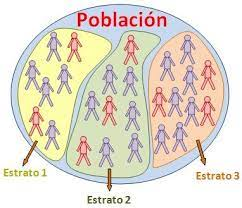

In [30]:
# Partidos jugados por cada Pais

df7 = df1.drop_duplicates(subset=['home_team', 'away_team']).count()
df7.head()

date          10903
home_team     10903
away_team     10903
home_score    10903
away_score    10903
dtype: int64

Creo los estratos separando por la cantidad de partidos jugados

In [31]:

dfPaises = pd.unique(df1[['home_team', 'away_team']].values.ravel('K'))
#dfPaises

In [32]:
partidosJugados = df1.groupby(['home_team']).count()
partidosJugados[104:107]

,date,away_team,home_score,away_score,tournament,city,country,neutral,fecha,year
home_team,,,,,,,,,,
Germany,503,503,503,503,503,503,503,503,503,503
Ghana,284,284,284,284,284,284,284,284,284,284
Gibraltar,54,54,54,54,54,54,54,54,54,54


In [33]:
# Cantidad de partidos jugados por cada Pais
partidosJugados = df1.groupby(['home_team']).count() + df1.groupby(['away_team'	]).count()
partidosJugados= partidosJugados['date'][104:107]
partidosJugados

German DR    298.0
Germany      946.0
Ghana        598.0
Name: date, dtype: float64

In [34]:
# Cantidad de partidos ganados en casa

partidosJugados = df1[(df1['home_score'] > df1['away_score'])].groupby(['home_team']).count() 
partidosJugados= partidosJugados[['date']][95:102]
partidosJugados 

,date
home_team,
Gabon,83
Galicia,3
Gambia,39
Georgia,47
German DR,77
Germany,315
Ghana,174


In [35]:
partidosJugados=pd.DataFrame(partidosJugados)
partidosJugados.sort_values('date')
partidosJugados=partidosJugados.reset_index()
partidosJugados.rename(columns={ 'home_team': 'Pais2', 'date': 'Pais'})
type(partidosJugados)
partidosJugados.columns

Index(['home_team', 'date'], dtype='object')

In [36]:
partidosJugados.sort_values('date')
partidosJugados

,home_team,date
0,Gabon,83
1,Galicia,3
2,Gambia,39
3,Georgia,47
4,German DR,77
5,Germany,315
6,Ghana,174


Creo los percentiles de los partidos jugados.
Quiero ver el impacto en el muestreo si lo estratifico en 4 categorias en funcion de la cantidad de partidos jugados... 
A mas partidos jugados.... más profesional eres

In [37]:
print(partidosJugados.date.quantile([.25, .5, .75]))
qs=partidosJugados.date.quantile([.25, .5, .75]).values

#Distribuyo los valores por Cuartiles:
partidosJugados['Cuartil']= pd.qcut(partidosJugados['date'],  
                             q = 4, labels = False)
partidosJugados

0.25     43.0
0.50     77.0
0.75    128.5
Name: date, dtype: float64


,home_team,date,Cuartil
0,Gabon,83,2
1,Galicia,3,0
2,Gambia,39,0
3,Georgia,47,1
4,German DR,77,1
5,Germany,315,3
6,Ghana,174,3


In [38]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
# Obtener la frecuencia de ocurrencia con Sidetable

import sidetable as stb
df1.stb.freq(['home_team'])

,home_team,count,percent,cumulative_count,cumulative_percent
0,Brazil,567,1.374779,567,1.374779
1,Argentina,547,1.326286,1114,2.701064
2,Mexico,512,1.241423,1626,3.942487
3,Germany,503,1.219601,2129,5.162088
4,England,491,1.190505,2620,6.352593
...,...,...,...,...,...
305,Madrid,1,0.002425,41239,99.990301
306,Kabylia,1,0.002425,41240,99.992726
307,Crimea,1,0.002425,41241,99.995151
308,Chameria,1,0.002425,41242,99.997575


In [40]:
 
#Busco los partidos que ha ganado localmente
df1['homeGanador'] = np.where(df1['home_score']>df1['away_score'], 1, 0)

partidosJugados = df1[(df1['homeGanador'] == 'pierde_Empata')].groupby(['home_team']).count() 
partidosJugados= partidosJugados[['date']][95:102]
partidosJugados= partidosJugados.sort_values(by = ['date'])
partidosJugados 


,date
home_team,


In [41]:
df3=df1.groupby('home_team', as_index=False).agg({'homeGanador': "sum", 'home_score':'count'})

In [42]:
# Se ve claramente en los extremos perdemos la informacion importantes

df3=df1.groupby('home_team', as_index=False).agg({'homeGanador': "sum", 'home_score':'count'})

df3['%']=round(df3['homeGanador']/df3['home_score']*100,1)

df3= df3.set_axis(['Pais', 'PartidosGanadosCasa', 'PartidosJugados', '%_ganados'], axis=1)
df3.rename({'home_team': 'Pais', 'home_score': 'partidosJugados'}, axis = 1)
df3['Cuartil']= pd.qcut(df3['PartidosJugados'],  
                             q = 3, labels = False)
df3 =df3.sort_values('PartidosJugados')
df3['perdidos']= df3['PartidosJugados']- df3['PartidosGanadosCasa']
df3[50:-20]

,Pais,PartidosGanadosCasa,PartidosJugados,%_ganados,Cuartil,perdidos
254,South Ossetia,1,7,14.3,0,6
143,Kernow,3,8,37.5,0,5
63,Corsica,3,8,37.5,0,5
84,Ellan Vannin,5,8,62.5,0,3
286,United Koreans in Japan,2,8,25.0,0,6
...,...,...,...,...,...,...
256,Spain,243,357,68.1,2,114
237,Saudi Arabia,201,359,56.0,2,158
142,Kenya,187,367,51.0,2,180
137,Japan,189,368,51.4,2,179


Se ve claramente que a más partidos jugados (Eres del cuartil 4), tienes más experiencia, eres mas estable porque el IQR es más pequeño que los otros cuartiles, y como juegas más es porque al ganar partidos avanzas más en el campeonato y logiamente debes ganar más partidos en casa tambien.

***La estratificacion la he hecho por la cantidad de partidos jugados.***

In [43]:
df4=df3.groupby('Cuartil', as_index=False).agg({'PartidosGanadosCasa': "sum", 'PartidosJugados':'sum'})
df4['%']=round(df4['PartidosGanadosCasa']/df4['PartidosJugados']*100,1)
df4['perdidos']= df4['PartidosJugados']- df4['PartidosGanadosCasa']
df4

,Cuartil,PartidosGanadosCasa,PartidosJugados,%,perdidos
0,0,421,1058,39.8,637
1,1,3954,9560,41.4,5606
2,2,15678,30625,51.2,14947


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


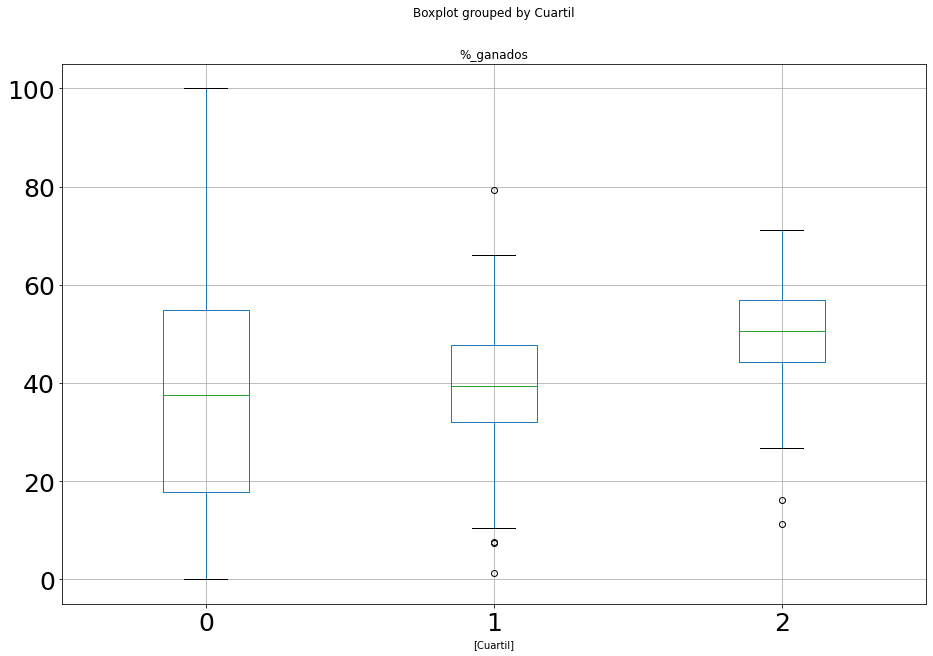

In [44]:
df3.boxplot(column=['%_ganados'], by=['Cuartil'], figsize=(15,10), fontsize=25)
 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f18fa93d950>],
      dtype=object)

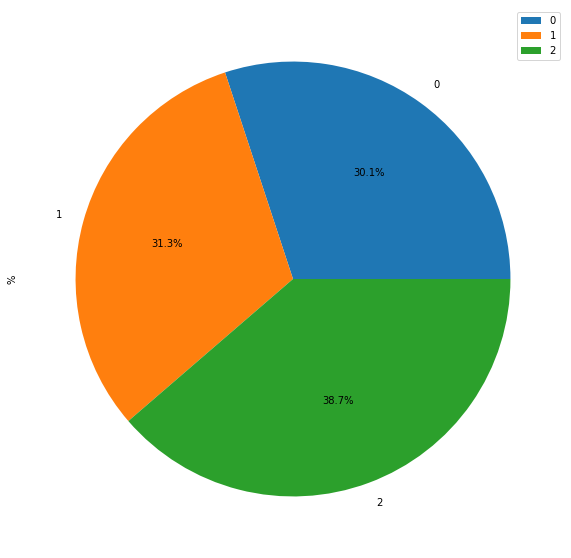

In [45]:
df4.plot.pie(y = '%', figsize=(15,10), autopct='%1.1f%%', subplots=True)

In [46]:

muestraQ0= df3[df3['Cuartil']==0].sample(20)
muestraQ0Porcentaje =muestraQ0['PartidosGanadosCasa'].sum()/muestraQ0['PartidosJugados'].sum()
print('\n\nEl % de partidos ganados en casa en el Cuartil 1 de modo aleatorio estratificado es de: ',round(muestraQ0Porcentaje*100,3), '%')



El % de partidos ganados en casa en el Cuartil 1 de modo aleatorio estratificado es de:  42.601 %


In [47]:
muestraQ3= df3[df3['Cuartil']==2].sample(20)
muestraQ3Porcentaje =muestraQ3['PartidosGanadosCasa'].sum()/muestraQ3['PartidosJugados'].sum()
print('El % de partidos ganados en casa en el Cuartil 4 de modo aleatorio es de: ',round(muestraQ3Porcentaje*100,3), '%')

El % de partidos ganados en casa en el Cuartil 4 de modo aleatorio es de:  50.189 %


Comparar con toda la muestra:

In [48]:
df4

,Cuartil,PartidosGanadosCasa,PartidosJugados,%,perdidos
0,0,421,1058,39.8,637
1,1,3954,9560,41.4,5606
2,2,15678,30625,51.2,14947


La direncia es de decimas de % de error.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


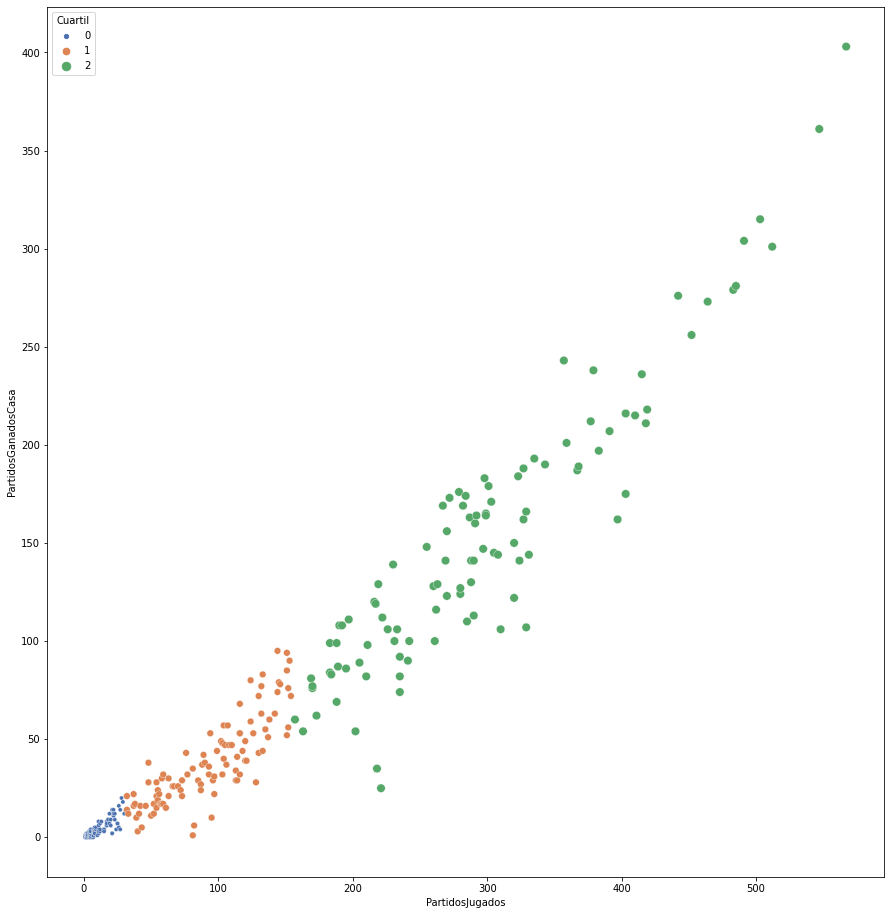

In [49]:
import seaborn as sns 
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(15,16))


sns.axes_style( )  
sns.scatterplot( 'PartidosJugados','PartidosGanadosCasa', data= df3, hue='Cuartil', palette="deep", size='Cuartil')
#sns.title('Relacion partidos Jugados v Ganados')  
#plt.show()


# ¿Qué es SMOTE?
SMOTE es un algoritmo de sobremuestreo que se basa en el concepto de vecinos más cercanos para crear sus datos sintéticos. Propuesto de nuevo en 2002 por Chawla et. Alabama ., SMOTE se ha convertido en uno de los algoritmos más populares para el sobremuestreo.

Los datos sintéticos son datos artificiales generados de forma inteligente que se asemejan a la forma o los valores de los datos que se pretende mejorar. En lugar de simplemente hacer nuevos ejemplos proceso de copiar los datos que ya tenemos (como se explica en el último párrafo), un generador de datos sintéticos crea datos que son similares al existente. La creación de datos sintéticos es donde SMOTE brilla.

el punto azul rodeado con un círculo es la observación actual, el punto azul no rodeado es su vecino más cercano y el punto verde es el sintético.

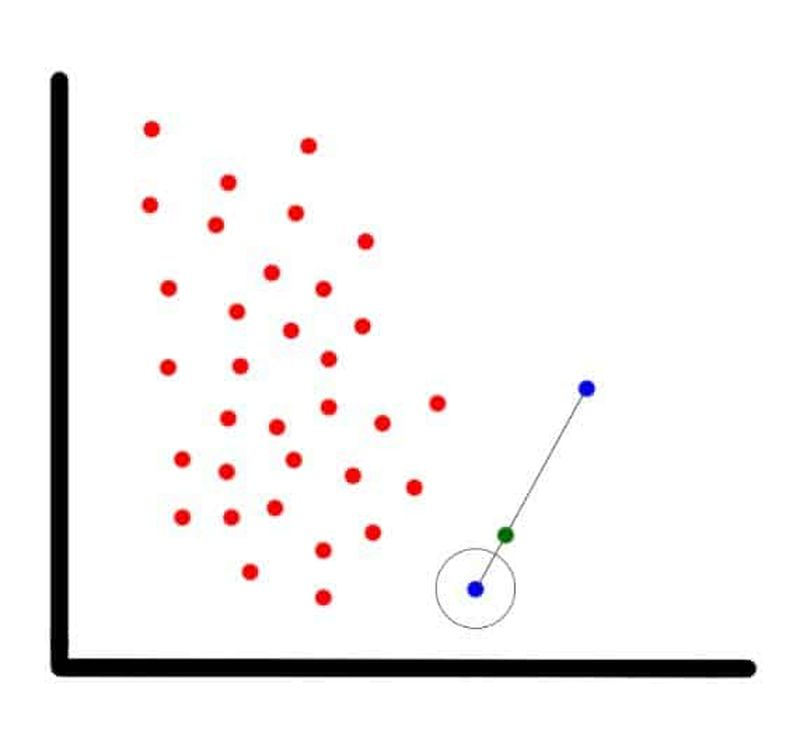

In [50]:
df5.head()

date  home_team  home_score  away_score  tournament  city  \
away_team year                                                              
Abkhazia  2012     1          1           1           1           1     1   
          2014     2          2           2           2           2     2   
          2017     4          4           4           4           4     4   
          2018     1          1           1           1           1     1   
          2019     2          2           2           2           2     2   

                country  neutral  fecha  
away_team year                           
Abkhazia  2012        1        1      1  
          2014        2        2      2  
          2017        4        4      4  
          2018        1        1      1  
          2019        2        2      2

In [51]:
# voy a crear catalunya
df5=pd.DataFrame(df1[ (df1['home_team'] == 'Catalonia') |
                      (df1['away_team'] == 'Catalonia')])
print(df5.info())

for p,q in enumerate(df5): 
  print(p, q)

paises =df5["home_team"].value_counts().rename_axis('home_team').reset_index(name="visits")
paises.head()
#df5.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 307 to 38534
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         47 non-null     object        
 1   home_team    47 non-null     object        
 2   away_team    47 non-null     object        
 3   home_score   47 non-null     int64         
 4   away_score   47 non-null     int64         
 5   tournament   47 non-null     object        
 6   city         47 non-null     object        
 7   country      47 non-null     object        
 8   neutral      47 non-null     bool          
 9   fecha        47 non-null     datetime64[ns]
 10  year         47 non-null     int64         
 11  homeGanador  47 non-null     int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(6)
memory usage: 4.5+ KB
None
0 date
1 home_team
2 away_team
3 home_score
4 away_score
5 tournament
6 city
7 country
8 neutral
9 fecha
10 year
11 homeGan

,home_team,visits
0,Catalonia,38
1,Basque Country,7
2,France,1
3,Czechoslovakia,1


In [52]:
paises =df5["away_team"].value_counts().rename_axis('away_team').reset_index(name="visits")
paises.head()

,away_team,visits
0,Catalonia,9
1,Basque Country,7
2,Spain,4
3,Brazil,4
4,Argentina,3


In [53]:
df5.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,fecha,year,homeGanador
307,1912-02-10,France,Catalonia,7,0,Friendly,Paris,France,False,1912-02-10,1912,1
338,1912-12-01,Catalonia,France,1,0,Friendly,Barcelona,Spain,False,1912-12-01,1912,1
405,1915-01-03,Basque Country,Catalonia,6,1,Friendly,Bilbao,Spain,False,1915-01-03,1915,1
407,1915-02-07,Catalonia,Basque Country,2,2,Friendly,Barcelona,Spain,False,1915-02-07,1915,0
409,1915-05-13,Basque Country,Catalonia,1,0,Friendly,Madrid,Spain,False,1915-05-13,1915,1


In [54]:
spain2= spain.copy()
spain2['equipoContrario'] = np.where(spain2['away_team'] == 'Spain', spain2['home_team'], spain2['away_team'])
spain2['winSpain'] = np.where(((spain2['home_team'] == 'Spain') & (spain2['home_score'] >spain2['away_score'])) |
                              ((spain2['away_team'] == 'Spain') & (spain2['home_score'] <spain2['away_score']))    ,1, 0)
#spain2


In [55]:
# Verifico como actua con los partidos que en teoria ha perdido Spain.
# Verifico y está bien.

pierde = spain2.loc[:,'winSpain'] ==0
pierde2 = spain2.loc[pierde]
pierde2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,fecha,year,equipoContrario,winSpain
1119,1928-04-22,Spain,Italy,1,1,Friendly,Gijón,Spain,False,1928-04-22,1928,Italy,0
1375,1931-04-19,Spain,Italy,0,0,Friendly,Bilbao,Spain,False,1931-04-19,1931,Italy,0
1380,1931-04-26,Spain,Republic of Ireland,1,1,Friendly,Barcelona,Spain,False,1931-04-26,1931,Republic of Ireland,0
1842,1936-01-19,Spain,Austria,4,5,Friendly,Madrid,Spain,False,1936-01-19,1936,Austria,0
1849,1936-02-23,Spain,Germany,1,2,Friendly,Barcelona,Spain,False,1936-02-23,1936,Germany,0


In [56]:
gana2=pd.DataFrame(pierde2)
gana2.shape

(121, 13)

In [57]:
partidosjugados= spain2.groupby(['equipoContrario']).count()
partidosjugados

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,fecha,year,winSpain
equipoContrario,,,,,,,,,,,,
Albania,4,4,4,4,4,4,4,4,4,4,4,4
Andorra,1,1,1,1,1,1,1,1,1,1,1,1
Argentina,9,9,9,9,9,9,9,9,9,9,9,9
Armenia,3,3,3,3,3,3,3,3,3,3,3,3
Austria,8,8,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...
United States,4,4,4,4,4,4,4,4,4,4,4,4
Uruguay,8,8,8,8,8,8,8,8,8,8,8,8
Venezuela,2,2,2,2,2,2,2,2,2,2,2,2


In [58]:
partidosjugados= spain2.groupby(['equipoContrario','winSpain']).size().to_frame('ganados')
partidosjugados

ganados
equipoContrario winSpain         
Albania         1               4
Andorra         1               1
Argentina       0               3
                1               6
Armenia         1               3
...                           ...
Venezuela       1               2
Wales           0               2
                1               2
Yugoslavia      0               5
                1               4

[118 rows x 1 columns]

In [59]:
partidosjugados= spain2.groupby(['equipoContrario']).size().to_frame('jugados')
partidosjugados

,jugados
equipoContrario,
Albania,4
Andorra,1
Argentina,9
Armenia,3
Austria,8
...,...
United States,4
Uruguay,8
Venezuela,2


In [60]:
partidosGanados= spain2.groupby(['equipoContrario']).sum()
partidosGanados.drop(['home_score', 'away_score', 'year', 'neutral'], axis = 'columns', inplace = True)
partidosGanados

,winSpain
equipoContrario,
Albania,4
Andorra,1
Argentina,6
Armenia,3
Austria,5
...,...
United States,3
Uruguay,5
Venezuela,2


In [61]:
resumen = pd.concat([partidosGanados, partidosjugados], axis = 1,)
resumen = resumen.sort_values('jugados')[-10:]
resumen['proporcion'] = (resumen['winSpain']/resumen['jugados'])
resumen = resumen.sort_values('proporcion')
resumen['proporcion'] = resumen['proporcion'].apply(lambda x: format(x, '.2%'))
resumen


,winSpain,jugados,proporcion
equipoContrario,,,
Germany,3,10,30.00%
England,7,15,46.67%
Belgium,5,10,50.00%
Russia,5,10,50.00%
Italy,8,15,53.33%
France,10,17,58.82%
Portugal,11,17,64.71%
Republic of Ireland,9,13,69.23%
Northern Ireland,7,10,70.00%


# SMOTEN
https://imbalanced-learn.org/stable/over_sampling.html

In [62]:
# Saco las variables de X
resumen = resumen.reset_index(drop= False)
X= resumen.iloc[:,[0,1,2,]]
X

,equipoContrario,winSpain,jugados
0,Germany,3,10
1,England,7,15
2,Belgium,5,10
3,Russia,5,10
4,Italy,8,15
5,France,10,17
6,Portugal,11,17
7,Republic of Ireland,9,13
8,Northern Ireland,7,10
9,Switzerland,8,11


In [63]:
y= resumen.iloc[:,[3]]
y

,proporcion
0,30.00%
1,46.67%
2,50.00%
3,50.00%
4,53.33%
5,58.82%
6,64.71%
7,69.23%
8,70.00%
9,72.73%


In [64]:
from collections import Counter
# create a synthetic data set with continuous and categorical features
rng = np.random.RandomState(42)
n_samples = 50
X = np.empty((n_samples, 3), dtype=object)
X[:, 0] = rng.choice(['A', 'B', 'C'], size=n_samples).astype(object)
X[:, 1] = rng.randn(n_samples)
X[:, 2] = rng.randint(3, size=n_samples)
y = np.array([0] * 20 + [1] * 30)
print(sorted(Counter(y).items()))

[(0, 20), (1, 30)]


In [65]:
#resumen = df5.reset_index(drop= False)
X= df5.iloc[:,[1, 3, 10]]
X.head()
X.shape


(47, 3)

In [66]:
y= df5['homeGanador']
y.shape

(47,)

In [67]:

from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
print(y_resampled.shape)

(48,)


In [68]:
X_resampled


,home_team,home_score,year
0,France,7,1912
1,Catalonia,1,1912
2,Basque Country,6,1915
3,Catalonia,2,1915
4,Basque Country,1,1915
5,Catalonia,1,1916
6,Catalonia,0,1916
7,Basque Country,5,1916
8,Catalonia,4,1921
9,Catalonia,1,1921


# What is reservoir sampling?

Reservoir sampling is a randomized algorithm that is used to select k
k
 out of n
n
 samples; n
n
 is usually very large or unknown. For example, reservoir sampling can be used to obtain a sample of size k
k
 from a population of people with brown hair. This algorithm takes O(n)
O(n)
 to select k
k
 elements with uniform probability.

svg viewer

https://www.educative.io/answers/what-is-reservoir-sampling

In [69]:
# Including dependancies
import random
# Defining the parameters
n = 8
k = 4
# The array to be sampled
input_array = [1, 7, 4, 8, 2, 6, 5, 9]
output = []
# Initializing the output array to the first k elements
# of the input array
for i in range(k):
  output.append(input_array[i])
# Iterating over k to n-1
for j in range(k,n):
  # Generating a random number
  index = random.randint(0, j)
  # Replacing an element in the  output with an element
  # in the input if the randomly generated number is less
  # than k.
  if index < k:
    output[index] = input_array[j]
print("Input array:")
print(input_array)
print("Output array:")
print(output)

Input array:
[1, 7, 4, 8, 2, 6, 5, 9]
Output array:
[1, 9, 4, 2]


In [70]:
input_array = df5
n= df5.shape[0]
n
k=4

output = []

for i in range(k):
  output.append(input_array.iloc[i])
# Iterating over k to n-1


for j in range(k,n):
  # Generating a random number
  index = random.randint(0, j)
  # Replacing an element in the  output with an element
  # in the input if the randomly generated number is less
  # than k.


  if index < k:
    print ('n= ', n, 'K= ', k)
    output[index] = input_array.iloc[j]

print("Input array:")
print(input_array)
print("Output array:")
print(output)


n=  47 K=  4
n=  47 K=  4
n=  47 K=  4
n=  47 K=  4
n=  47 K=  4
n=  47 K=  4
n=  47 K=  4
n=  47 K=  4
n=  47 K=  4
n=  47 K=  4
n=  47 K=  4
Input array:
             date       home_team       away_team  home_score  away_score  \
307    1912-02-10          France       Catalonia           7           0   
338    1912-12-01       Catalonia          France           1           0   
405    1915-01-03  Basque Country       Catalonia           6           1   
407    1915-02-07       Catalonia  Basque Country           2           2   
409    1915-05-13  Basque Country       Catalonia           1           0   
422    1916-05-21       Catalonia  Basque Country           1           3   
423    1916-05-22       Catalonia  Basque Country           0           0   
426    1916-06-04  Basque Country       Catalonia           5           0   
566    1921-04-03       Catalonia        Provence           4           0   
567    1921-04-04       Catalonia        Provence           1           0 